 <font color='Blue' size="6"> Melanoma_Skin_Cancer_Assignment</font>

## Problem statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing Skin Cancer Data

## Importing all the important libraries

In [95]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [96]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer/Train")
data_dir_test = pathlib.Path('Skin cancer/Test')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [97]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

## Create a dataset
Define some parameters for the loader:

In [98]:
batch_size = 32
img_height = 180
img_width = 180

In [99]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_width, img_height),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [100]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_width, img_height),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [101]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
     

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

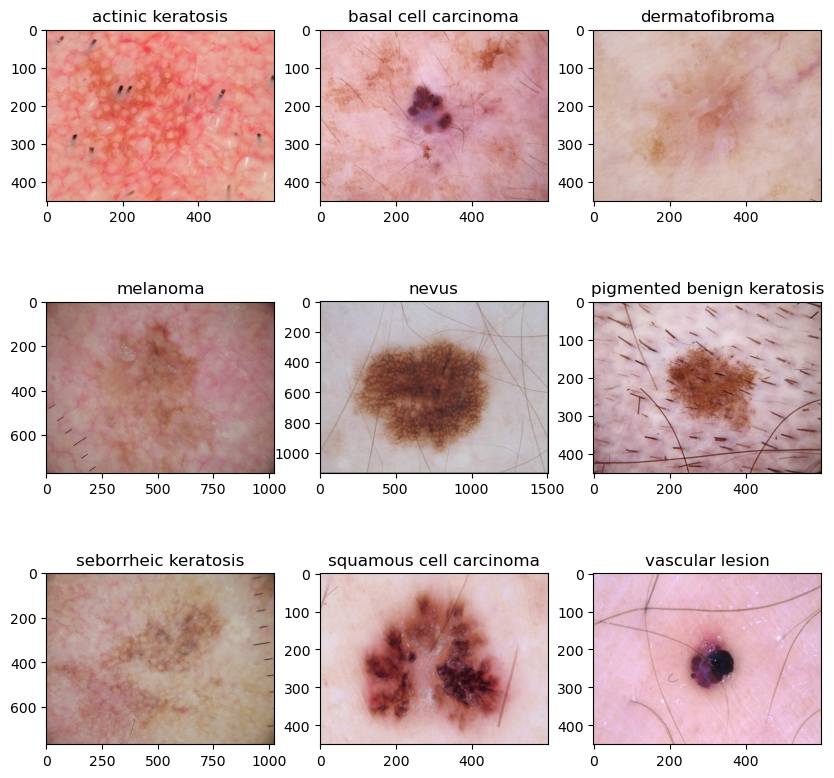

In [102]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3, i+1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [103]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [104]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

## Compile the model
Choose an appropirate optimiser and loss function for model training

In [105]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [106]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [107]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 134s 2s/step - loss: 2.0697 - accuracy: 0.1842 - val_loss: 2.0104 - val_accuracy: 0.2125
Epoch 2/20
56/56 [==============================] - 122s 2s/step - loss: 1.9775 - accuracy: 0.2338 - val_loss: 1.8754 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 123s 2s/step - loss: 1.9240 - accuracy: 0.2701 - val_loss: 1.9905 - val_accuracy: 0.2908
Epoch 4/20
56/56 [==============================] - 123s 2s/step - loss: 1.8630 - accuracy: 0.2969 - val_loss: 1.8348 - val_accuracy: 0.3020
Epoch 5/20
56/56 [==============================] - 125s 2s/step - loss: 1.8325 - accuracy: 0.3276 - val_loss: 1.8117 - val_accuracy: 0.3132
Epoch 6/20
56/56 [==============================] - 125s 2s/step - loss: 1.7618 - accuracy: 0.3326 - val_loss: 1.6795 - val_accuracy: 0.4072
Epoch 7/20
56/56 [==============================] - 126s 2s/step - loss: 1.6890 - accuracy: 0.3767 - val_loss: 1.6410 - val_accuracy: 0.4094
Epoch 8/20
56

# Visualizing training results

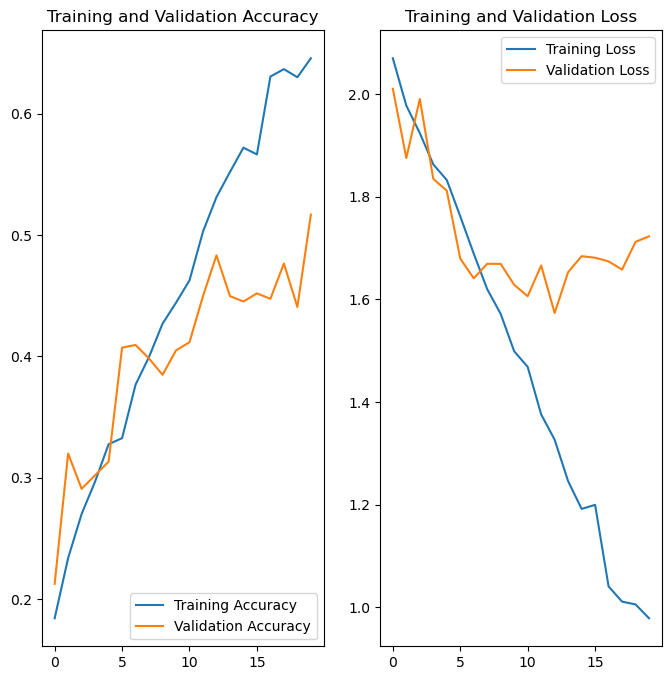

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
Finding on the first base model

- The model is underfitting because we can also see difference in loss functions in training & test after 10th epoch.

- The accuracy is just around 64%.

- But again, it's too early to comment on the overfitting & underfitting debate.

In [109]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

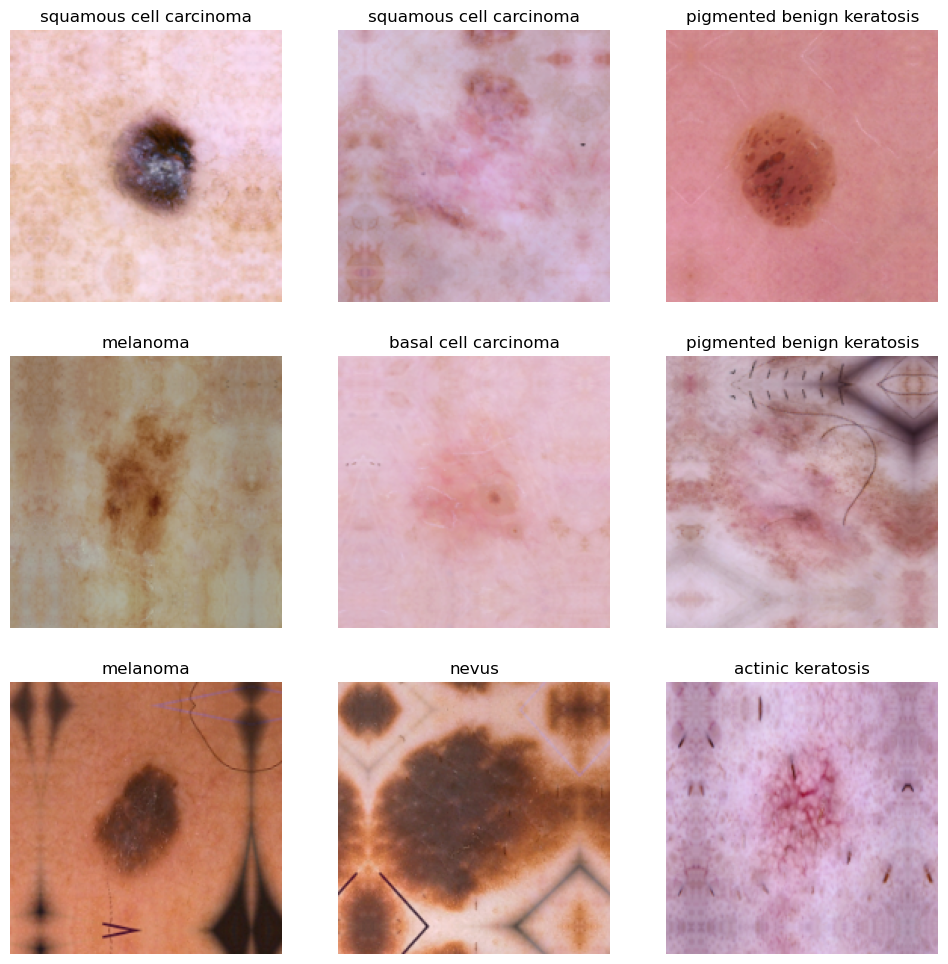

In [110]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Todo:
# Create the model, compile and train the model

In [111]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [112]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the Model

In [113]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 158s 3s/step - loss: 2.0771 - accuracy: 0.2042 - val_loss: 2.0412 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 156s 3s/step - loss: 1.9665 - accuracy: 0.2333 - val_loss: 1.9823 - val_accuracy: 0.2013
Epoch 3/20
56/56 [==============================] - 154s 3s/step - loss: 1.8879 - accuracy: 0.2801 - val_loss: 1.7880 - val_accuracy: 0.3154
Epoch 4/20
56/56 [==============================] - 155s 3s/step - loss: 1.9118 - accuracy: 0.2695 - val_loss: 1.8379 - val_accuracy: 0.3132
Epoch 5/20
56/56 [==============================] - 155s 3s/step - loss: 1.7664 - accuracy: 0.3432 - val_loss: 1.7074 - val_accuracy: 0.3758
Epoch 6/20
56/56 [==============================] - 155s 3s/step - loss: 1.7106 - accuracy: 0.3834 - val_loss: 1.6626 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 157s 3s/step - loss: 1.6293 - accuracy: 0.4062 - val_loss: 1.5820 - val_accuracy: 0.4676
Epoch 8/20
56

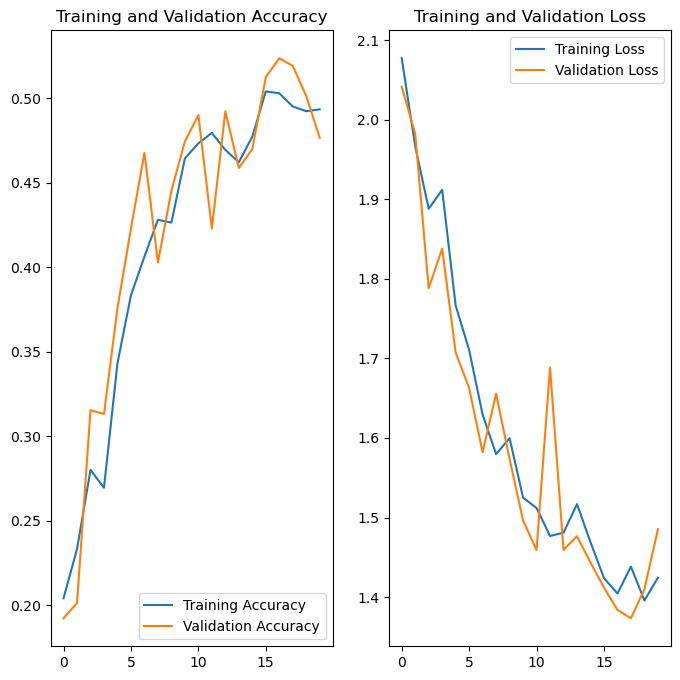

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding from Second Model

- The accuracy has decreased after data augmentation. 
- the difference in training loss and validation loss reduced significantly meaning overfitting/underfitting is overcome as well.
- We can increase the epochs to increase the accuracy.


## Todo: Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [115]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer/Train/actinic keratosis/ISIC_00294...,actinic keratosis
1,Skin cancer/Train/actinic keratosis/ISIC_00319...,actinic keratosis
2,Skin cancer/Train/actinic keratosis/ISIC_00295...,actinic keratosis
3,Skin cancer/Train/actinic keratosis/ISIC_00266...,actinic keratosis
4,Skin cancer/Train/actinic keratosis/ISIC_00321...,actinic keratosis
...,...,...
2234,Skin cancer/Train/vascular lesion/ISIC_0032919...,vascular lesion
2235,Skin cancer/Train/vascular lesion/ISIC_0033031...,vascular lesion
2236,Skin cancer/Train/vascular lesion/ISIC_0031197...,vascular lesion
2237,Skin cancer/Train/vascular lesion/ISIC_0030882...,vascular lesion


In [116]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer/Train/actinic keratosis/ISIC_00294...,actinic keratosis
1,Skin cancer/Train/actinic keratosis/ISIC_00319...,actinic keratosis
2,Skin cancer/Train/actinic keratosis/ISIC_00295...,actinic keratosis
3,Skin cancer/Train/actinic keratosis/ISIC_00266...,actinic keratosis
4,Skin cancer/Train/actinic keratosis/ISIC_00321...,actinic keratosis
...,...,...
2234,Skin cancer/Train/vascular lesion/ISIC_0032919...,vascular lesion
2235,Skin cancer/Train/vascular lesion/ISIC_0033031...,vascular lesion
2236,Skin cancer/Train/vascular lesion/ISIC_0031197...,vascular lesion
2237,Skin cancer/Train/vascular lesion/ISIC_0030882...,vascular lesion


<BarContainer object of 9 artists>

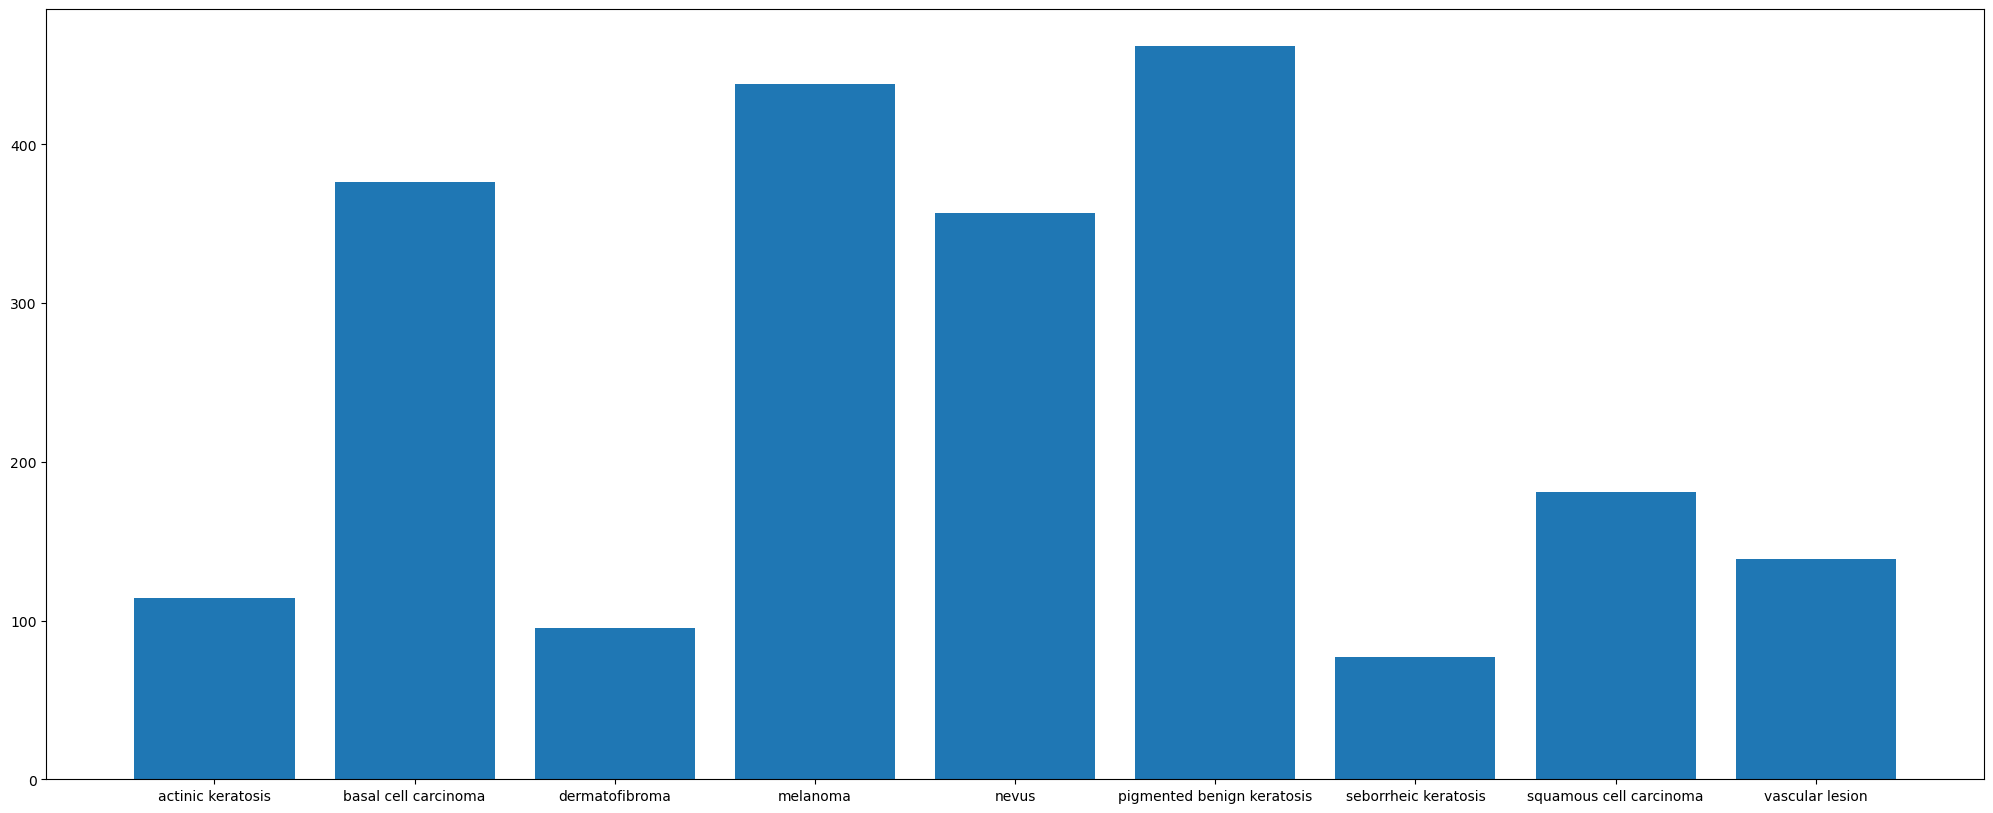

In [117]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?

Answer-1 :- seborrheic keratosis has least number of samples

Answer-2:- melanoma and pigmented benign keratosis have proportionate number of classes


## Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [118]:
!pip install Augmentor

## To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [119]:
#path_to_training_dataset="/content/drive/MyDrive/Cancer Detection /Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("Skin cancer/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=957x723 at 0x7


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA866C613D0>: 100%


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA63C304430>: 100


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA864602FD0>: 100%


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA636785A90>: 100


Initialised with 2239 image(s) found.
Output directory set to Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA635D06F70>: 100


In [120]:
data_dir_train1 = pathlib.Path("Skin cancer/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [121]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Skin cancer/Train/actinic keratosis/ISIC_00294...,actinic keratosis
1,Skin cancer/Train/actinic keratosis/ISIC_00319...,actinic keratosis
2,Skin cancer/Train/actinic keratosis/ISIC_00295...,actinic keratosis
3,Skin cancer/Train/actinic keratosis/ISIC_00266...,actinic keratosis
4,Skin cancer/Train/actinic keratosis/ISIC_00321...,actinic keratosis
...,...,...
6734,Skin cancer/Train/output/vascular lesion/vascu...,vascular lesion
6735,Skin cancer/Train/output/vascular lesion/vascu...,vascular lesion
6736,Skin cancer/Train/output/vascular lesion/vascu...,vascular lesion
6737,Skin cancer/Train/output/vascular lesion/vascu...,vascular lesion


## Lets see the distribution of augmented data after adding new images to the original training data.

In [122]:
new_df['Label'].value_counts()

pigmented benign keratosis    1359
melanoma                      1329
nevus                         1130
basal cell carcinoma          1090
squamous cell carcinoma        556
vascular lesion                404
actinic keratosis              349
dermatofibroma                 301
seborrheic keratosis           221
Name: Label, dtype: int64

### Todo: Train the model on the data created using Augmentor

In [123]:
batch_size = 32
img_height = 180
img_width = 180

In [124]:
import pathlib
data_dir_train1=pathlib.Path("Skin cancer/Train")

In [125]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [131]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("Skin cancer/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [132]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### Todo: Create your model (make sure to include normalization)

In [133]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [134]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Todo: Train your model

In [ ]:
epochs =20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
113/113 [==============================] - 271s 2s/step - loss: 0.1700 - accuracy: 0.9458 - val_loss: 1.4910 - val_accuracy: 0.7511
Epoch 2/20
113/113 [==============================] - 273s 2s/step - loss: 0.1737 - accuracy: 0.9453 - val_loss: 1.7860 - val_accuracy: 0.6556
Epoch 3/20
113/113 [==============================] - 279s 2s/step - loss: 0.1718 - accuracy: 0.9467 - val_loss: 1.4236 - val_accuracy: 0.7611
Epoch 4/20
113/113 [==============================] - 272s 2s/step - loss: 0.1421 - accuracy: 0.9553 - val_loss: 1.6992 - val_accuracy: 0.7378
Epoch 5/20
113/113 [==============================] - 289s 3s/step - loss: 0.1405 - accuracy: 0.9542 - val_loss: 1.6961 - val_accuracy: 0.7344
Epoch 6/20
113/113 [==============================] - 269s 2s/step - loss: 0.1457 - accuracy: 0.9525 - val_loss: 1.6730 - val_accuracy: 0.7456
Epoch 7/20
113/113 [==============================] - 1304s 12s/step - loss: 0.1459 - accuracy: 0.9528 - val_loss: 1.8366 - val_accuracy: 0.72

### Todo: Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Accuracy on training data has increased by using Augmentor library

Model is still overfitting

The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

The Model can be further improved by tuning the hyperparameter